CONTEXT: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a
classifier capable of determining a plant's species from a photo.

DATA DESCRIPTION: The dataset comprises of images from 12 plant species.
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo.

Steps and tasks:

1. Import and Understand the data. 

A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.

In [1]:
import zipfile

with zipfile.ZipFile('plant-seedlings-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

B. Map the images from train folder with train labels to form a DataFrame. 
Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image.

In [1]:
import cv2
import os,glob
import matplotlib.pylab as plt
from os import listdir,makedirs
from os.path import isfile,join
import pandas as pd
import numpy as np

path=os.getcwd()+r'\plant-seedlings-classification\train'

folders =  os.listdir(path)

data = []

X=[]
y=[]

class_labels=[]

for folder in folders:
    
    path_updated = path + '\\'+folder 

    files = os.listdir(path_updated)
    
    class_labels.append(folder)

    for file in files:

        img = cv2.imread(os.path.join(path_updated,file),cv2.IMREAD_COLOR)
        img = cv2.resize(img, (196, 196))
        img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        data.append([file[:-4],folder,img])
        
        X.append(img)
        y.append(folder)
        
df = pd.DataFrame(data, columns=['NameOfImage', 'Species','Image'])

In [2]:
df.head()

,NameOfImage,Species,Image
0,0050f38b3,Black-grass,"[[[0.15428571, 0.28571427, 0.45714286], [0.102..."
1,0183fdf68,Black-grass,"[[[0.21965317, 0.25433525, 0.31213874], [0.231..."
2,0260cffa8,Black-grass,"[[[0.08866995, 0.13793103, 0.22660097], [0.128..."
3,05eedce4d,Black-grass,"[[[0.352518, 0.5899281, 0.76258993], [0.366906..."
4,075d004bc,Black-grass,"[[[0.80193233, 0.7826087, 0.7874396], [0.78743..."


In [3]:
number_of_images_in_data_set=len(df.index)

print('Number of images in data set:')
print(number_of_images_in_data_set)

Number of images in data set:
4750


In [4]:
print('Unique labels for images:')
print(class_labels)

Unique labels for images:
['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


C. Write a function that will select n random images and display images along with its species.
Hint: If input for function is 5, it should print 5 random images along with its labels. 

In [5]:
import random

def display_images(number_of_images_to_display):
    
    for index in range(0,number_of_images_to_display):
        
        random_id=random.randint(0,number_of_images_in_data_set)
        
        plt.title(df.NameOfImage[random_id]+':'+df.Species[random_id])
        plt.imshow(df.Image[random_id])
        plt.show()

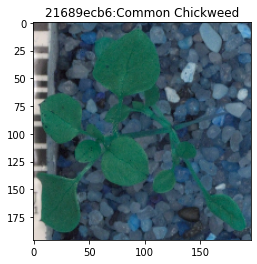

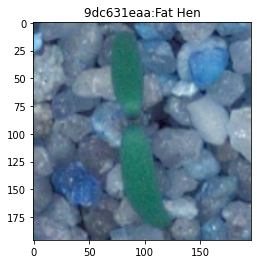

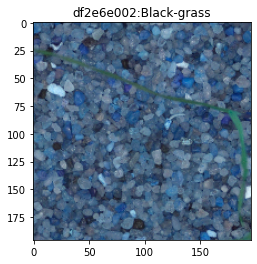

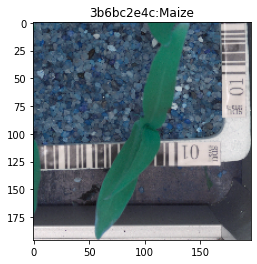

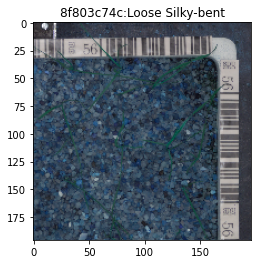

In [6]:
display_images(5)

2. Data preprocessing

A. Create X & Y from the DataFrame

In [7]:
print('X and y have been created already')

X and y have been created already


In [8]:
X= np.array(X).reshape(-1, 196, 196, 3)

In [9]:
print('X shape:')
print(X.shape)

X shape:
(4750, 196, 196, 3)


B. Encode labels of the images

In [10]:
# Categorical data to be converted to numeric data
from tensorflow.keras.utils import to_categorical

mapping = {}
for index in range(len(class_labels)):
  mapping[class_labels[index]] = index

# integer representation
for index in range(len(y)):
  y[index] = mapping[y[index]]

y = to_categorical(y)

In [11]:
print('y shape:')
print(y.shape)

y shape:
(4750, 12)


C. Unify shape of all the images

In [12]:
print("Previously performed")

Previously performed


D. Normalise all the images

In [13]:
print("Previously performed")

Previously performed


3. Model training

Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.

A. Split the data into train and test data.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print("{0:0.2f}% data is in training set".format((len(X_train)/number_of_images_in_data_set) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/number_of_images_in_data_set) * 100))

70.00% data is in training set
30.00% data is in test set


In [15]:
print('Number of train images:')
print(len(X_train))

Number of train images:
3325


In [16]:
print('Number of test images:')
print(len(X_test))

Number of test images:
1425


B. Create new CNN architecture to train the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
# Initialising the CNN classifier
classifier1 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(32, (3, 3), input_shape = (196, 196, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier1.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier1.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier1.add(Dropout(0.5))

# Adding a fully connected layer with 128 neurons
classifier1.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 12 neuron to predict the categorical classifcation
classifier1.add(Dense(units = 12, activation = 'softmax'))

In [19]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
classifier1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
classifier1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

C. Train the model on train data and validate on test data

In [22]:
classifier1.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
26/26 [==============================] - 48s 2s/step - loss: 2.4229 - accuracy: 0.1510 - val_loss: 2.2913 - val_accuracy: 0.2393
Epoch 2/20
26/26 [==============================] - 47s 2s/step - loss: 1.9924 - accuracy: 0.3230 - val_loss: 1.6690 - val_accuracy: 0.3895
Epoch 3/20
26/26 [==============================] - 48s 2s/step - loss: 1.5993 - accuracy: 0.4289 - val_loss: 1.4059 - val_accuracy: 0.4968
Epoch 4/20
26/26 [==============================] - 47s 2s/step - loss: 1.3373 - accuracy: 0.5314 - val_loss: 1.2022 - val_accuracy: 0.5993
Epoch 5/20
26/26 [==============================] - 47s 2s/step - loss: 1.1298 - accuracy: 0.6150 - val_loss: 1.1615 - val_accuracy: 0.6021
Epoch 6/20
26/26 [==============================] - 48s 2s/step - loss: 1.0026 - accuracy: 0.6589 - val_loss: 1.0002 - val_accuracy: 0.6632
Epoch 7/20
26/26 [==============================] - 47s 2s/step - loss: 0.8948 - accuracy: 0.6953 - val_loss: 1.0388 - val_accuracy: 0.6533
Epoch 8/20
26/26 [==

D. Select a random image and print actual label and predicted label for the same

In [26]:
import random
random_id=random.randint(0,number_of_images_in_data_set)

print('Image ID:',random_id)

Random_image=X[random_id]
Random_image= np.array(Random_image).reshape(-1, 196, 196, 3)

prediction=classifier1.predict(Random_image)

#printing the predicted label
print('Predicted label:', prediction)

#printing actual label
print('Actual label:', y[random_id])

Image ID: 2919
Predicted label: [[1.1149176e-06 3.1905188e-06 8.4533883e-07 2.1550726e-02 4.5453422e-07
  5.8460115e-05 6.1995826e-07 9.7603774e-01 6.5410591e-04 1.6356416e-03
  2.0362809e-06 5.4896725e-05]]
Actual label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
